### Learning curves and fire probability

In [1]:
import Modelling_tools as MT
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
%matplotlib inline

In [2]:
import seaborn as sns

### Load models

In [3]:
fileloc = "/Users/rmartinshort/Documents/Insight/Project/FirescapeSF/firescapeapp/models/"
model_SF = pickle.load(open('RC_model_SF_2018.sav', 'rb'))
model_EF = pickle.load(open('RC_model_EF_2018.sav', 'rb'))
model_VF = pickle.load(open('RC_model_VF_2018.sav', 'rb'))

In [4]:
dataset = pd.read_csv("/Users/rmartinshort/Documents/Insight/Project/census_block_prediction/Fully_merged_dataset_Autogenerated_plus.csv")

In [5]:
#Do something about the NaNs
dataset['UnkownUseType'].fillna(1,inplace=True)
dataset['S'].fillna(1,inplace=True)
values = {'COMH':0, 'COMM':0, 'COMO':0, 'COMR':0, 'GOVT':0, 'IND':0, 'MISC':0,
       'MRES':0, 'SRES':0, 'A':0, 'B':0, 'C':0, 'D':0}
dataset = dataset.fillna(value=values)
dataset.fillna(dataset.mean(),inplace=True)

In [6]:
dataset.drop(['IDyear_x.1'],inplace=True,axis=1)

In [7]:
#Structural
X,y,XholdoutSF,yholdoutSF,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='SF_pred',yearto_holdout=2018)
#External
X,y,XholdoutEF,yholdoutEF,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='EF_pred',yearto_holdout=2018)
##Vehicle 
X,y,XholdoutVF,yholdoutVF,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='VF_pred',yearto_holdout=2018)

In [10]:
#Predict fire probs for 2018
SF_2018_pred = model_SF.predict_proba(XholdoutSF)
VF_2018_pred = model_VF.predict_proba(XholdoutVF)
EF_2018_pred = model_EF.predict_proba(XholdoutEF)

### Plot PR curves

In [16]:
precisionEF, recallEF, thresholds = precision_recall_curve(yholdoutEF,EF_2018_pred[:,1])
precisionVF, recallVF, thresholds = precision_recall_curve(yholdoutVF,VF_2018_pred[:,1])
precisionSF, recallSF, thresholds = precision_recall_curve(yholdoutSF,SF_2018_pred[:,1])

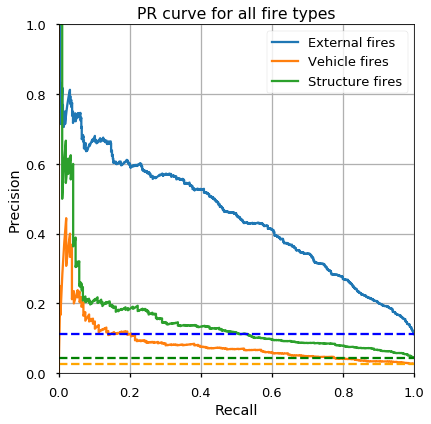

In [46]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(recallEF,precisionEF,label='External fires')
ax.plot(recallVF,precisionVF,label='Vehicle fires')
ax.plot(recallSF,precisionSF,label='Structure fires')
ax.axhline(precisionEF[0],linestyle='--',color='blue')
ax.axhline(precisionVF[0],linestyle='--',color='orange')
ax.axhline(precisionSF[0],linestyle='--',color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.title('PR curve for all fire types')
plt.tight_layout()
plt.ylim([0,1])
plt.xlim([0,1])
plt.legend()
plt.savefig('PR_curves.png',dpi=400)

In [34]:
precisionEF

array([0.11155378, 0.11143171, 0.11144702, ..., 1.        , 1.        ,
       1.        ])

In [40]:
#Predict fire probs for 2019
SF_2019_pred = model_SF.predict_proba(Xuseforfuture)
VF_2019_pred = model_VF.predict_proba(Xuseforfuture)
EF_2019_pred = model_EF.predict_proba(Xuseforfuture)

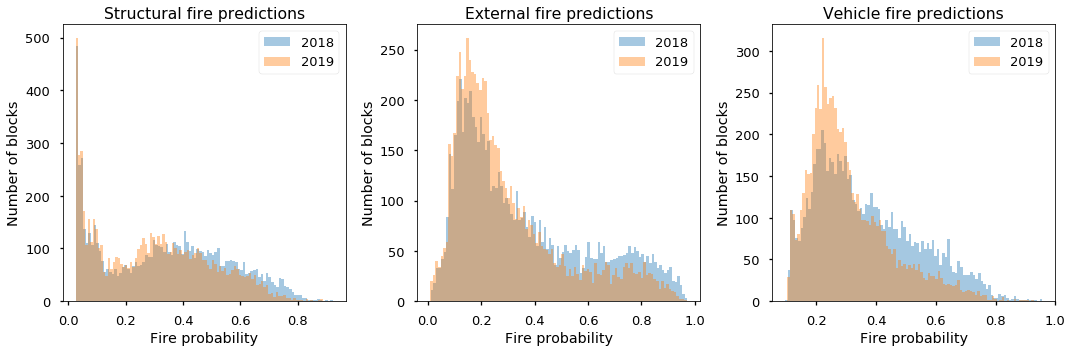

In [41]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(131)
sns.distplot(SF_2018_pred[:,1],kde=False,bins=100,label='2018',ax=ax)
sns.distplot(SF_2019_pred[:,1],kde=False,bins=100,label='2019',ax=ax)
plt.xlabel('Fire probability')
plt.ylabel('Number of blocks')
ax.legend()
ax.set_title('Structural fire predictions')

ax = fig.add_subplot(132)
sns.distplot(EF_2018_pred[:,1],kde=False,bins=100,label='2018',ax=ax)
sns.distplot(EF_2019_pred[:,1],kde=False,bins=100,label='2019',ax=ax)
plt.xlabel('Fire probability')
plt.ylabel('Number of blocks')
ax.legend()
ax.set_title('External fire predictions')

ax = fig.add_subplot(133)
sns.distplot(VF_2018_pred[:,1],kde=False,bins=100,label='2018',ax=ax)
sns.distplot(VF_2019_pred[:,1],kde=False,bins=100,label='2019',ax=ax)
plt.xlabel('Fire probability')
plt.ylabel('Number of blocks')
ax.legend()
ax.set_title('Vehicle fire predictions')
plt.tight_layout()
plt.savefig('Fire_probs_2018_2019.png',dpi=400)

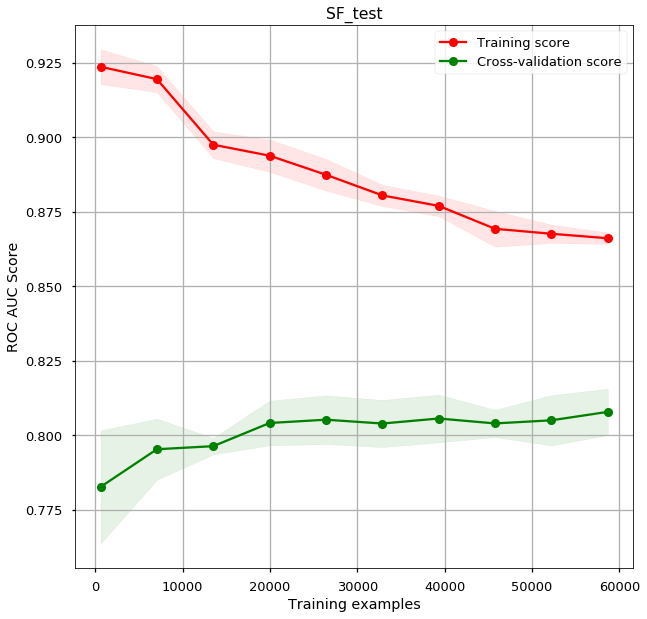

In [42]:
#Structural fires learning curve 
X,y,XholdoutSF,yholdoutSF,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='SF_pred',yearto_holdout=2018)
LC_SF = MT.plot_Learning_curve(model_SF,'SF_test',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))

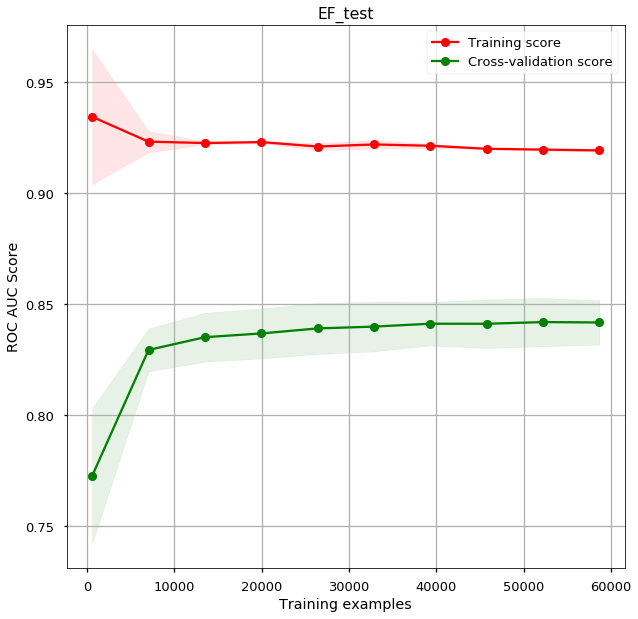

In [45]:
#External fires learning curve 
X,y,XholdoutEF,yholdoutEF,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='EF_pred',yearto_holdout=2018)
LC_EF = MT.plot_Learning_curve(model_EF,'EF_test',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))

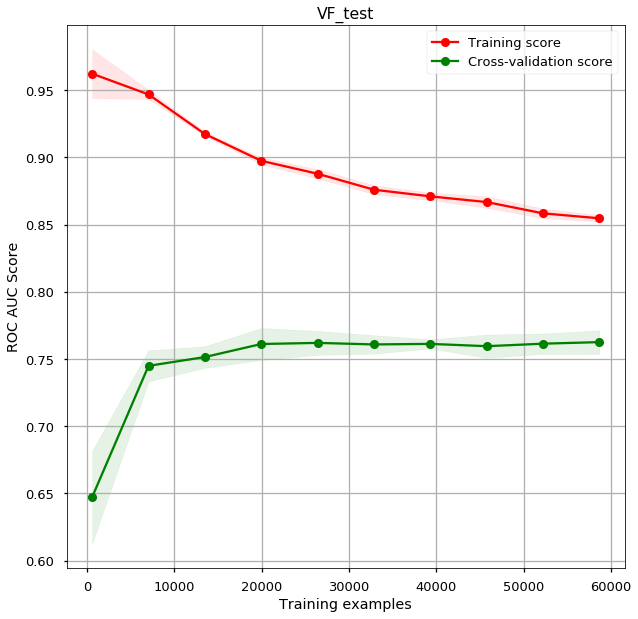

In [44]:
#Vehicle fires learning curve 
X,y,XholdoutVF,yholdoutVF,Xuseforfuture,holdout,use_for_future = MT.setupdataset(dataset,fire_to_predict='VF_pred',yearto_holdout=2018)
LC_VF = MT.plot_Learning_curve(model_VF,'VF_test',X,y,cv=5,n_jobs=4,train_sizes=np.linspace(.01, 1.0, 10))